# AQME for CSEARH and CMIN module, following which inputs for gaussian is generated

In [1]:
from rdkit import RDLogger                                                                                                                                                               
RDLogger.DisableLog('rdApp.*') 

from aqme.csearch import csearch
from aqme.cmin import cmin
from aqme.qprep import qprep
   

##### Other imports

In [3]:
from rdkit import Chem
import rdkit

#### TASK 1: SMILES input of quinine, CSEARCH (conformer search) with RDKit, CMIN (conformer minimization, additional refinement) with xTB

###### Step 1: doing CSEARCH

In [4]:
smi = 'COC1=CC2=C(C=CN=C2C=C1)[C@H]([C@@H]3C[C@@H]4CCN3C[C@@H]4C=C)O'
params = 'params.yaml'

In [5]:
csearch_conf = csearch(smi,'quinine',CSEARCH='rdkit')
# run this function using a varfile
# csearch_conf = csearch('SMILES','quinine',varfile=params)

In [6]:
csearch_data = csearch_conf.compute_confs()
csearch_data

Molecule RDKit-Initial-samples RDKit-energy-window  \
0  quinine                   600                 231   

  RDKit-initial_energy_threshold RDKit-RMSD-and-energy-duplicates  \
0                            335                                0   

  RDKit-Unique-conformers CSEARCH time (seconds) Overall charge  status  \
0                      34                  34.47              0     1.0   

  update_to_rdkit  
0           False

###### Step 2: Doing CMIN with the sdf obtained from CSEARCH

In [7]:
for file in csearch_conf.csearch_file:
    csearch_mols = Chem.SDMolSupplier(str(file),removeHs=False)
    cmin_conf = cmin(csearch_mols,'quinine',CMIN='xtb')
    # run this function using a varfile
    # cmin_conf = cmin(csearch_mols,'quinine',varfile=params)
    

In [8]:
cmin_data = cmin_conf.compute_cmin()
cmin_data

xTB-Initial-samples xTB-energy-window xTB-initial_energy_threshold  \
0                  36                 1                            0   

  xTB-RMSD-and-energy-duplicates xTB-Unique-conformers CMIN time (seconds)  \
0                              0                    35              184.54   

  Overall charge Molecule  
0              0  quinine

###### Step 3: Writing Gaussian input files with the sdf obtained from CMIN

In [9]:
cmin_mols = Chem.SDMolSupplier(str(cmin_conf.cmin_file),removeHs=False)
for i, mol in enumerate(cmin_mols):
    charge= int(mol.GetProp('Real charge'))
    qprep(mol=mol, molecule='quinine_conf_'+str(i+1), charge=charge, suffix='CMIN-xTB', qm_input='B3LYP/6-31G** opt freq',mem='24GB',nprocs=8)
    # run this function using a varfile
    # qprep(mol=mol, molecule='quinine_conf_'+str(i+1), charge=charge, varfile=params)
    

#### TASK 2: SMILES input of a noncovalent isopentane--water complex, CSEARCH with CREST

In [10]:
smi = 'CCC(C)C.O'
params = 'params-crest.yaml'

In [11]:
csearch_conf = csearch(smi,'test',varfile=params)

In [12]:
csearch_data = csearch_conf.compute_confs()
csearch_data

for file in csearch_conf.csearch_file:
    csearch_mols = Chem.SDMolSupplier(str(file),removeHs=False)
    for i, mol in enumerate(csearch_mols):
        charge= int(mol.GetProp('Real charge'))
        qprep(mol=mol, molecule='ts2_conf_'+str(i+1), charge=charge, suffix='CMIN-xTB', qm_input='B3LYP/6-31G** opt freq',mem='24GB',nprocs=8)

FileNotFoundError: [WinError 2] The system cannot find the file specified

#### TASK 3: TS including a three-component noncovalent complex, input form smi, CSEARCH with CREST

In [3]:
smi = 'O.FC(C)(C)C.[Cl-]'
mol = Chem.MolFromSmiles(smi)
mol = Chem.AddHs(mol)
for i,atom in enumerate(mol.GetAtoms()):
    atom.SetAtomMapNum(i+3) 
smi_new = Chem.MolToSmiles(mol)
print(smi_new)


[Cl-:9].[F:4][C:5]([C:6]([H:12])([H:13])[H:14])([C:7]([H:15])([H:16])[H:17])[C:8]([H:18])([H:19])[H:20].[O:3]([H:10])[H:11]


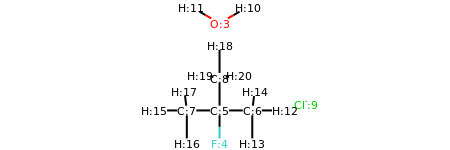

In [4]:
mol

In [5]:
constraits_dist = [[4,5,1.8],[5,9,1.8]]
constraits_angle = [[9,5,4,180]]

In [6]:
csearch_ts = csearch(smi_new,'ts2',CSEARCH='crest',
                     constraints_dist=constraits_dist,constraints_angle=constraits_angle, ts_complex=True, cregen=True)

----
[[4.  5.  1.8]
 [5.  9.  1.8]] [[  9.   5.   4. 180.]] []
----
[[2.  3.  1.8]
 [3.  1.  1.8]] [[  1.   3.   2. 180.]] []


In [7]:
ts_data = csearch_ts.compute_confs()

[array([2. , 3. , 1.8]), array([3. , 1. , 1.8]), [3.0, 4.0, 1.539], [3.0, 5.0, 1.538], [3.0, 6.0, 1.542], [4.0, 8.0, 1.107], [4.0, 9.0, 1.105], [4.0, 10.0, 1.108], [5.0, 11.0, 1.108], [5.0, 12.0, 1.111], [5.0, 13.0, 1.109], [6.0, 14.0, 1.109], [6.0, 15.0, 1.109], [6.0, 16.0, 1.111], [7.0, 17.0, 0.991], [7.0, 18.0, 0.991]]
-  RUNNING ts2 WITH xTB --xyzout ts2_xtb1.xyz --charge 0 --dist 2,3,1.8 --dist 3,1,1.8 --dist 3,4,1.539 --dist 3,5,1.538 --dist 3,6,1.542 --dist 4,8,1.107 --dist 4,9,1.105 --dist 4,10,1.108 --dist 5,11,1.108 --dist 5,12,1.111 --dist 5,13,1.109 --dist 6,14,1.109 --dist 6,15,1.109 --dist 6,16,1.111 --dist 7,17,0.991 --dist 7,18,0.991 --angle 1,3,2,180.0 -  outfile ts2_xtb1.out -  outxyz ts2_xtb1.xyz 

normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


[[2.  3.  1.8]
 [3.  1.  1.8]]
-  RUNNING ts2_xtb1 WITH xTB --xyzout ts2_xtb2.xyz --charge 0 --dist 2,3,1.8 --dist 3,1,1.8 --angle 1,3,2,180.0 -  outfile ts2_xtb2.out -  outxyz ts2_xtb2.xyz 

normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
<.xcontrol.sample> written. exit.


-  RUNNING ts2_xtb2 WITH crest -  outfile crest_conformers.out --xyzoutall ts2_conformers.xyz --xyzoutbest ts2_best.xyz --charge 0 --constraint 2,3,1 --cbonds 0.5 -  constraint 2,3,1 -  RUNNING ts2_conformers and ts2_best WITH cregen -  outfile crest_conformers.out --xyzout ts2_conformers_cregen.xyz --charge 0 --ethr 0.2 --rthr 0.125 --bthr 0.01 --ewin 6 

1 molecule converted
6 molecules converted
6 files output. The first is ts2_conf_1.xyz
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


In [8]:
ts_data

Molecule crest-conformers CSEARCH time (seconds) Overall charge  status  \
0      ts2                6                  114.4              0     1.0   

   update_to_rdkit  
0            False

In [9]:
for file in csearch_ts.csearch_file:
    csearch_mols = Chem.SDMolSupplier(str(file),removeHs=False)
    for i, mol in enumerate(csearch_mols):
        charge= int(mol.GetProp('Real charge'))
        qprep(mol=mol, molecule='ts2_conf_'+str(i+1), charge=charge, suffix='CMIN-xTB', qm_input='B3LYP/6-31G** opt freq',mem='24GB',nprocs=8)